Solving the Sturm-Liouvillle eigenvalues problem using a computational approach for any quantum potential:

\begin{equation}
-\frac{\hbar ^ 2}{2 m} \frac{d^2}{dx ^2} \psi (x) + V(x) \psi (x) = E \psi(x) \nonumber
\end{equation}

\begin{equation}
\begin{cases}

\psi (x = 0) = 0 \\ \nonumber
\psi (x = L) = 0

\end{cases}
\end{equation}



In [1]:
# Importing libraries
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
from scipy.constants import physical_constants, hbar, e

plt.style.use('classic')

Let $ y = x / L $, adimensional variable. Thus: $ \psi (x) \rightarrow \psi(y) $

In [2]:
# Defining physics parameters
w = 1e12
m = physical_constants["electron mass"][0] # electron mass
L = 10 * np.sqrt(hbar / (m * w)) # 10 times the characteristic length

# Defining N, dy, y
N = 10000
dy = 1 / N
y = np.linspace(0, 1, N + 1)[1:-1]

In [3]:
# Defining the harmonic potential as V(y) = V_0 * f(y)
def f(y):
    return (y - 0.5) ** 2

V_0 = 0.5 * m * ((w * L) ** 2)
V = V_0 * f(y)

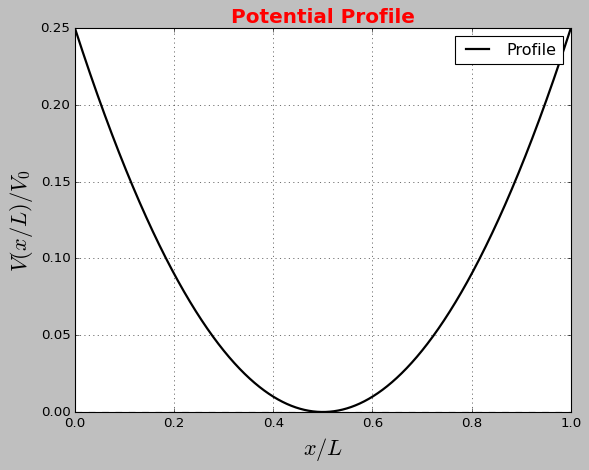

In [4]:
# Plotting the potential's profile
plt.plot(y, f(y), label= "Profile", color= "black", linewidth= 2)
plt.axhline(color= "black", linestyle= "--", linewidth= 1)
plt.title("Potential Profile", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("$ x / L $", fontsize= 20)
plt.ylabel("$ V(x / L) / V_0 $", fontsize= 20)
plt.grid()
plt.legend()

In [5]:

# Defining the Toeplitz matrix
diag = (1 / (dy ** 2)) + ((m * ((L / hbar) ** 2)) * V)
diag_off = (- 1 / (2 * (dy ** 2))) * np.ones(len(diag) - 1)

# Solving the problem
eigenvalues, eigenfunctions = eigh_tridiagonal(diag, diag_off)

eigenfunctions = eigenfunctions.T
E = (((hbar / L) ** 2) * (eigenvalues / m)) / e # Using eV


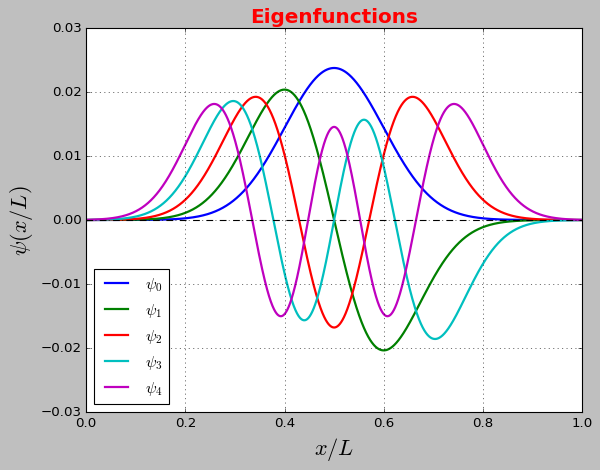

In [6]:
# Plotting the eigenfunctions
n = 5

[plt.plot(y, eigenfunctions[k], label= f"$ \psi_{k} $", linewidth= 2) for k in range(n)]
plt.axhline(color= "black", linestyle= "--", linewidth= 1)
plt.title("Eigenfunctions", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("$ x / L $", fontsize= 20)
plt.ylabel("$ \psi(x / L) $", fontsize= 20)
plt.grid()
plt.legend(loc= "lower left")

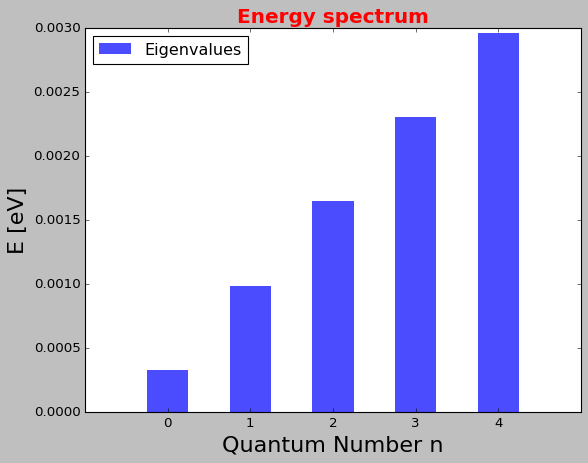

In [7]:
# Plotting the energy spectrum
n_ = np.arange(0, n, 1)

plt.bar(x= n_, height= E[0 : n], width= 0.5, color= "blue", alpha= 0.7, edgecolor= "black", linewidth= 0, label= "Eigenvalues", tick_label= [f"{j}" for j in n_])
plt.title("Energy spectrum", fontweight= "bold", fontsize= 18, color= "red")
plt.xlabel("Quantum Number n", fontsize= 20)
plt.ylabel("E [eV]", fontsize=20)
plt.legend(loc= "upper left")